<h1>Importando Bibliotecas</h1>

In [149]:
import pandas as pd #Trata os df
from dotenv import load_dotenv #Carrega chave API
import os #Acessa diretórios 

from llama_index.core import Settings #Configurações do modelo
from llama_index.llms.groq import Groq #Modelo

from llama_index.experimental.query_engine import PandasQueryEngine #Vai nos devolver a consulta em fortado de formulas usando pandas

import textwrap #Formata texto

from llama_index.core import PromptTemplate #Template
from llama_index.experimental.query_engine.pandas import PandasInstructionParser #Separa as instruções

from llama_index.core.query_pipeline import (QueryPipeline as QP, Link, InputComponent)#Pipeline

import gradio as gr #Para criação da aplicação

from fpdf import FPDF #Para geração de PDF's

from datetime import datetime #Gerar nome dos relatórios relativo a sua data de criação

<h1>Carregando dados</h1>

In [5]:
df = pd.read_csv('./vendas.csv')
df.head(10)

,ID_compra,filial,cidade,tipo_cliente,genero,tipo_produto,preco_unitario,quantidade,imposto_5%,total,data,hora,forma_pagamento,avaliacao
0,750-67-8428,A,Santo André,Membro,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Carteira Digital,9.1
1,226-31-3081,C,São Caetano,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Dinheiro,9.6
2,631-41-3108,A,Santo André,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Cartão de Crédito,7.4
3,123-19-1176,A,Santo André,Membro,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Carteira Digital,8.4
4,373-73-7910,A,Santo André,Normal,Masculino,Esportes e Viagem,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Carteira Digital,5.3
5,699-14-3026,C,São Caetano,Normal,Masculino,Eletrônicos,85.39,7,29.8865,627.6165,2024-03-25,18:30:00,Carteira Digital,4.1
6,355-53-5943,A,Santo André,Membro,Feminino,Eletrônicos,68.84,6,20.6520,433.6920,2024-02-25,14:36:00,Carteira Digital,5.8
7,315-22-5665,C,São Caetano,Normal,Feminino,Casa,73.56,10,36.7800,772.3800,2024-02-24,11:38:00,Carteira Digital,8.0
8,665-32-9167,A,Santo André,Membro,Feminino,Saúde e Beleza,36.26,2,3.6260,76.1460,2024-01-10,17:15:00,Cartão de Crédito,7.2
9,692-92-5582,B,São Bernardo do Campo,Membro,Feminino,Alimentos e Bebidas,54.84,3,8.2260,172.7460,2024-02-20,13:27:00,Cartão de Crédito,5.9


<h1>Analisando os dados</h1>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        1000 non-null   object 
 1   filial           1000 non-null   object 
 2   cidade           1000 non-null   object 
 3   tipo_cliente     1000 non-null   object 
 4   genero           1000 non-null   object 
 5   tipo_produto     1000 non-null   object 
 6   preco_unitario   1000 non-null   float64
 7   quantidade       1000 non-null   int64  
 8   imposto_5%       1000 non-null   float64
 9   total            1000 non-null   float64
 10  data             1000 non-null   object 
 11  hora             1000 non-null   object 
 12  forma_pagamento  1000 non-null   object 
 13  avaliacao        1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


<h4>Observações:</h4>
<ul><h6>É preciso realizar algumas transformações dos tipos de df das colunas <u>data e hora</u></h6></ul>

<h1>Alterando tipo de dados</h1>

<h4>Transformando coluna de data para o tipo datetime</h4>

In [11]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_compra        1000 non-null   object        
 1   filial           1000 non-null   object        
 2   cidade           1000 non-null   object        
 3   tipo_cliente     1000 non-null   object        
 4   genero           1000 non-null   object        
 5   tipo_produto     1000 non-null   object        
 6   preco_unitario   1000 non-null   float64       
 7   quantidade       1000 non-null   int64         
 8   imposto_5%       1000 non-null   float64       
 9   total            1000 non-null   float64       
 10  data             1000 non-null   datetime64[ns]
 11  hora             1000 non-null   object        
 12  forma_pagamento  1000 non-null   object        
 13  avaliacao        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1

<h4>Transformando hora para o tipo time</h4>

In [13]:
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_compra        1000 non-null   object        
 1   filial           1000 non-null   object        
 2   cidade           1000 non-null   object        
 3   tipo_cliente     1000 non-null   object        
 4   genero           1000 non-null   object        
 5   tipo_produto     1000 non-null   object        
 6   preco_unitario   1000 non-null   float64       
 7   quantidade       1000 non-null   int64         
 8   imposto_5%       1000 non-null   float64       
 9   total            1000 non-null   float64       
 10  data             1000 non-null   datetime64[ns]
 11  hora             1000 non-null   datetime64[ns]
 12  forma_pagamento  1000 non-null   object        
 13  avaliacao        1000 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1

<h1>Verificando a existência de duplicidade dos dados</h1>

In [15]:
df.duplicated().sum()

0

<h1>Configurando o LlhamaIndex</h1>

<h6>Consulte a documentação: <a href='https://docs.llamaindex.ai/en/stable/examples/query_engine/pandas_query_engine/'>link.</a></h6>

<h6>Carregando as variáveis do arquivo .env</h6>

In [19]:
load_dotenv()

api_key = os.getenv("GROQ_API_KEY")
print("Chave API carregada com sucesso" if api_key else "Erro ao carregar chave API.       ")

Chave API carregada com sucesso


<h1>Configurando a LLM</h1>

<h6>Vamos defirnir tanto o modelo quanto a chave</h6>

In [22]:
Settings.llm = Groq(model='llama3-70b-8192', api_key = api_key)

<h1>Transformando linguagem natural em código python + pandas</h1>

<h6>Instanciando o QueryEngine</h6>

In [25]:
query_engine = PandasQueryEngine(df=df, verbose=True)

<h6>Como é feito a pergunta e gerado a resposta</h6>

In [27]:
resposta = query_engine.query(
    'Qual é a filial com maior faturamento?'
)

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('filial')['total'].sum().idxmax()
```
> Pandas Output: C


<h1>Obtendo respostas com explicações</h1>

In [29]:
query_engine = PandasQueryEngine(df=df, verbose=True, synthesize_response=True)

In [30]:
resposta = query_engine.query(
    'Qual é a avaliacao media de cada filial?'
)

print(str(resposta))

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


<h4>Formatando Texto</h4>

In [32]:
def formatar_texto(response):
    texto = response.response
    texto_formatado = textwrap.fill(texto, width=60)
    print(texto_formatado)

In [33]:
formatar_texto(resposta)

A avaliação média de cada filial é a seguinte: a filial A
tem uma avaliação média de 7.03, a filial B tem uma
avaliação média de 6.82 e a filial C tem uma avaliação média
de 7.07.


<h1>Obtendo gráficos</h1>

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.tipo_produto.value_counts().head(5).plot(kind='bar')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
Based on the query results, here is a synthesized response:
"Here is the graph showing the top 5 best-selling products
and their respective quantities:  [Insert graph here]  As
shown in the graph, the top 5 products with the highest
sales are:  1. [Product 1]: [Quantity] 2. [Product 2]:
[Quantity] 3. [Product 3]: [Quantity] 4. [Product 4]:
[Quantity] 5. [Product 5]: [Quantity]  Note: The exact
product names and quantities are not provided in the output,
but you can replace them with the actual values 

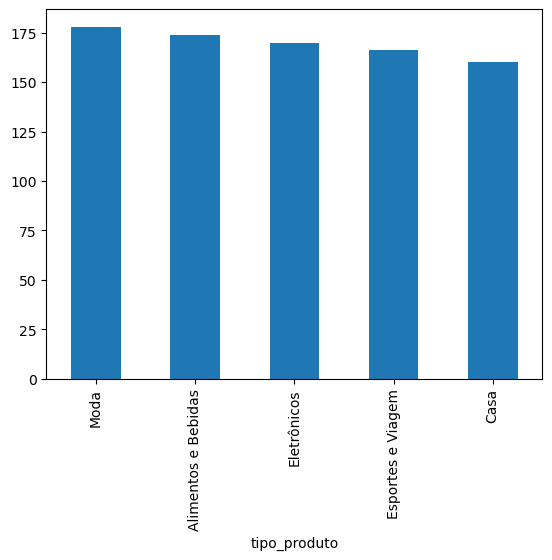

In [35]:
resposta = query_engine.query('Faça um gráfico mostrando os 5 produtos mais vendidos e suas respectivas quantidades')

formatar_texto(resposta)

<h1>Direcionando o idioma das respostas</h1>

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.tipo_produto.value_counts().nlargest(5).plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
Aqui está o gráfico horizontal dos 5 produtos mais vendidos
e suas respectivas quantidades:  **Gráfico:**  (O gráfico
não pode ser exibido aqui, mas imagine um gráfico de barras
horizontal com os 5 produtos mais vendidos no eixo y e suas
quantidades no eixo x)  **Legenda:**  * Produto 1: XXXX
(XXXX unidades vendidas) * Produto 2: YYYY (YYYY unidades
vendidas) * Produto 3: ZZZZ (ZZZZ unidades vendidas) *
Produto 4: WWWW (WWWW unidades vendidas) * Produto 5: VVVV
(VVVV unidades vendidas)  Observaçã

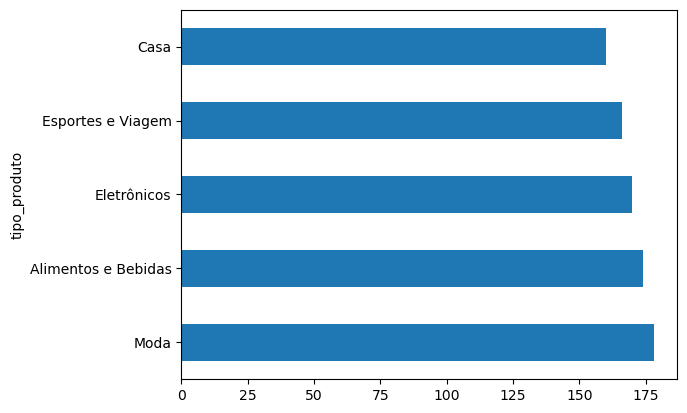

In [37]:
resposta = query_engine.query('Faça um gráfico na horizontal mostrando os 5 produtos mais vendidos e suas respectivas quantidades. Responda em português BR')

formatar_texto(resposta)

<h1>Definindo módulos do pipeline</h1>

In [39]:
def descricao_colunas(df):
    descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return 'Aqui estão os detlahes das coluna do DataFrame:\n'+ descricao


#Instruções para orientar o modelo a converter uma consulta em linguagem natural em código Python executável com a biblioteca Pandas
instruction_str = (
    "1. Converta a consulta para código Python executável usando Pandas.\n"
    "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
    "3. O código deve representar uma solução para a consulta.\n"
    "4. IMPRIMA APENAS A EXPRESSÃO.\n"
    "5. Não coloque a expressão entre aspas.\n")

#Prompt que será enviado ao modelo para que ela gere o código Pandas desejado
pandas_prompt_str = (
    "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
    "{colunas_detalhes}\n\n"
    "{colunas_detalhes}\n\n"
    "Este é o resultado de `print(df.head())`:\n"
    "{df_str}\n\n"
    "Siga estas instruções:\n"
    "{instruction_str}\n"
    "Consulta: {query_str}\n\n"
    "Expressão:"
)

#Prompt para guiar o modelo a sintetizar uma resposta com base nos resultados obtidos pela consulta Pandas
response_synthesis_prompt_str = (
   "Dada uma pergunta de entrada, atue como analista de df e elabore uma resposta a partir dos resultados da consulta.\n"
   "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
   "Consulta: {query_str}\n\n"
   "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
   "Saída do Pandas: {pandas_output}\n\n"
   "Resposta:"
   "Ao final, exibir o código usado para gerar a resposta, no formato: O código utilizado foi {pandas_instructions}"
)

#Módulo para obter as instruções Pandas
pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str, colunas_detalhes=descricao_colunas(df), df_str=df.head(5)
)
#Módulo para executar as instruções Pandas
pandas_output_parser = PandasInstructionParser(df)

#Módulo para sintetizar a resposta
response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

#Modelo
llm = Groq(model='llama3-70b-8192', api_key=api_key)

<h1>Construindo o pipeline</h1>

In [41]:
#Definindo Modelo
qp = QP(
    modules = {
        "input": InputComponent(),
        "pandas_prompt": pandas_prompt,
        "llm1":llm,
        "pandas_output_parser": pandas_output_parser,
        "response_synthesis_prompt": response_synthesis_prompt,
        "llm2":llm,
    },
    verbose=True
)

#Conectando as etapas
qp.add_chain(["input", "pandas_prompt","llm1","pandas_output_parser"])

#Definindo ligações
qp.add_links([
    Link("input","response_synthesis_prompt",dest_key="query_str"),
    Link("llm1","response_synthesis_prompt",dest_key="pandas_instructions"),
    Link("pandas_output_parser","response_synthesis_prompt",dest_key="pandas_output")
])

#Novo link
qp.add_link("response_synthesis_prompt","llm2")

In [42]:
response = qp.run(query_str='Qual a média gasta por cada tipo de cliente?')

> Running module input with input: 
query_str: Qual a média gasta por cada tipo de cliente?

> Running module pandas_prompt with input: 
query_str: Qual a média gasta por cada tipo de cliente?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui estão os detlahes das coluna do DataFrame:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`g...

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Running module pandas_output_parser with input: 
input: assistant: df.groupby('tipo_cliente')['total'].mean()

> Running module response_synthesis_prompt with input: 
query_str: Qual a média gasta por cada tipo de cliente?
pandas_instructions: assistant: df.groupby('tipo_cliente')['total'].mean()
pandas_output: tipo_cliente
Membro    327.791305
Normal    318.122856
Name:

In [43]:
texto = response.message.content
texto_formatado = textwrap.fill(texto, 80)
print(texto_formatado)

A média gasta por cada tipo de cliente é de R$ 327,79 para os membros e R$
318,12 para os clientes normais.  O código utilizado foi
df.groupby('tipo_cliente')['total'].mean()


<h4>Criando função</h4>

In [45]:
def descricao_colunas(df):
    descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return "Aqui estão os detalhes das colunas do dataframe:\n" + descricao

#Definição de módulos do pipeline
def pipeline_consulta(df):
    instruction_str = (
        "1. Converta a consulta para código Python executável usando Pandas.\n"
        "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
        "3. O código deve representar uma solução para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESSÃO.\n"
        "5. Não coloque a expressão entre aspas.\n")

    pandas_prompt_str = (
        "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este é o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instruções:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Expressão:"
)

    response_synthesis_prompt_str = (
       "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
       "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
       "Consulta: {query_str}\n\n"
       "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
       "Saída do Pandas: {pandas_output}\n\n"
       "Resposta: \n\n"
       "Ao final, exibir o código usado em para gerar a resposta, no formato: O código utilizado foi `{pandas_instructions}`"
    )

    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str,
    df_str=df.head(5),
    colunas_detalhes=descricao_colunas(df)
)

    pandas_output_parser = PandasInstructionParser(df)
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    #Criação do Query Pipeline
    qp = QP(
        modules={
            "input": InputComponent(),
            "pandas_prompt": pandas_prompt,
            "llm1": llm,
            "pandas_output_parser": pandas_output_parser,
            "response_synthesis_prompt": response_synthesis_prompt,
            "llm2": llm,
        },
        verbose=True,
    )
    qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])
    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output"),
        ]
    )
    qp.add_link("response_synthesis_prompt", "llm2")
    return qp

<h1>Criando Interface usando o Gradio</h1>

<h4>Definindo estrutura da Aplicacao</h4>

<h6>Criando funções auxiliares para carregamento dos dados e processamento de perguntas</h6>

In [165]:
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar",pd.DataFrame(), df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!",df.head(), df
    except Exception as e:
        return f"Errro ao carregar arquivo: {str(e)}",pd.DataFrame(), df_estado

def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return "" 

<h6>Funções para definir um histórico de armazenamento de perguntas e respostas, além disso a geração do relatório</h6>

In [176]:
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta,resposta))
        gr.Info("Adicionado ao PDF!", duration=2)
        return historico_estado

def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF", None

    #Gera nome do arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    #Gerando o aquivo PDF
    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    #Configurando a fonte
    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", 'B', 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", '', 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)

    pdf.output(caminho_pdf)
    return caminho_pdf

def limpar_pergunta_resposta():
    return "","" 

def resetar_aplicacao():
    return None,"A aplicação foi resetada. Por favor, faça o upload de um novo arquivo CSV.",pd.DataFrame(),"" ,None, [], "" 

<h6>Gradio</h6>

In [ ]:
#Criação da interface
with gr.Blocks(theme='Soft') as app:
    #Título da app
    gr.Markdown('# Analisando os dados🔎🎲')
    
    #Descrição
    gr.Markdown('''
    Carregue um arquivo CSV e faça perguntas sobre os dados. A cada pergunta, você poderá visualizar a resposta e, se desejar, adicionar essa interação ao PDF final, basta clicar em "Adicionar ao histórico do PDF". Para fazer uma nova pergunta, clique em "Limpar pergunta e resultado".
    Após definir as perguntas e respostas no histórico, clique em "Gerar PDF". Assim, será possível baixar um PDF com o registro completo das suas interações. Se você quiser analisar um novo dataset, basta clicar em "Quero analisar outro dataset" ao final da página.
    ''')

    #Campo de entrada de arquivos
    input_arquivo = gr.File(file_count='single', type='filepath', label='Upload CSV')

    #Status do upload
    upload_status = gr.Textbox(label="Status do upload:")

    #Tabela de dados
    tabela_dados = gr.DataFrame()

    #Campo de entrada de texto
    input_pergunta = gr.Textbox(label='Digite sua pergunta sobre os dados')
    # Exemplos de perguntas
    gr.Markdown("""
    Exemplos de perguntas:
    1. Qual é o número de registros no arquivo?
    2. Quais são os tipos de dados das colunas?
    3. Quais são as estatísticas descritivas das colunas numéricas?
    """)

    #Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button('Enviar')

    #Componente de resposta
    output_resposta = gr.Textbox(label='Resposta')

    with gr.Row():
        #Botão de limpeza
        botao_limpeza = gr.Button("Limpar pergunta e resposta")
        
        #Botão para adicionar a pergunta e a resposta ao histórico
        botao_add_pdf = gr.Button("Adicionar ao histórico do PDF")
        
        #Botão para gerar o PDF
        botao_gerar_pdf = gr.Button("Gerar PDF")

    #Componente de download
    arquivo_pdf = gr.File(label='Download do PDF')
    
    #Botão para resetar a aplicação
    botao_resetar = gr.Button("Quero analisar outro dataset!")

    #Gerenciamento de estados
    df_estado = gr.State(value=None)
    historico_estado = gr.State(value=[])
    
    #Conectando funções aos componentes
    input_arquivo.change(
        fn=carregar_dados,
        inputs=[input_arquivo, df_estado],
        outputs=[upload_status,tabela_dados, df_estado]
    )
    botao_submeter.click(
        fn=processar_pergunta,
        inputs=[input_pergunta, df_estado],
        outputs=output_resposta
    )
    botao_limpeza.click(
        fn=limpar_pergunta_resposta,
        inputs=[],
        outputs=[input_pergunta,output_resposta]
    )
    botao_add_pdf.click(
        fn=add_historico,
        inputs=[input_pergunta, output_resposta, historico_estado],
        outputs=historico_estado
    )
    botao_gerar_pdf.click(
        fn=gerar_pdf,
        inputs=[historico_estado],
        outputs=arquivo_pdf
    )
    botao_resetar.click(
        fn=resetar_aplicacao,
        inputs=[],
        outputs=[input_arquivo,upload_status,
                 tabela_dados,output_resposta,
                 arquivo_pdf,
                 historico_estado,
                 input_pergunta]
    )
    

app.launch(debug=True)

* Running on local URL:  http://127.0.0.1:7860
INFO:httpx:HTTP Request: GET http://127.0.0.1:7860/gradio_api/startup-events "HTTP/1.1 200 OK"
HTTP Request: GET http://127.0.0.1:7860/gradio_api/startup-events "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: HEAD http://127.0.0.1:7860/ "HTTP/1.1 200 OK"
HTTP Request: HEAD http://127.0.0.1:7860/ "HTTP/1.1 200 OK"

To create a public link, set `share=True` in `launch()`.


INFO:httpx:HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"
HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"
